<a href="https://colab.research.google.com/github/ShraddhaP123/LGMVIP-DataScience/blob/main/IRIS_FLOWER_CLASSIFICATION_USING_SUPERVISED_MACHINE_LEARNING_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS FLOWER CLASSIFICATION USING SUPERVISED MACHINE LEARNING ALGORITHM**

**AUTHOR : SHRADDHA SANJEEV PATTANSHETTI**

**LETSGROWMORE BEGINEER LEVEL TASK 1**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


**Importing Iris dataset from local machine**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


**Load Dataset through CSV file**

In [4]:
data=pd.read_csv("iris.csv")


In [5]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 6)

In [7]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [9]:
data.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
data.isna().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [11]:
data.tail()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


**Splitting dataset into training and testing**

In [12]:
train, test = train_test_split(data, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [13]:
x_train = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_train = train.Species

x_test = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_test = test.Species

In [14]:
x_train.head()



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
122,7.7,2.8,6.7,2.0
98,5.1,2.5,3.0,1.1
29,4.7,3.2,1.6,0.2
25,5.0,3.0,1.6,0.2
109,7.2,3.6,6.1,2.5


In [15]:
y_test.head()

92     versicolor
135     virginica
44         setosa
110     virginica
33         setosa
Name: Species, dtype: object

**Logistic regression as a mode**l

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9736842105263158


**Confusion matrix as a model**

In [17]:
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[14  0  0]
 [ 0 12  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**Support Vector as a model**

In [18]:
model1 = SVC()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print("Acc=",accuracy_score(y_test,y_pred))

Acc= 0.9736842105263158


**KNN as a model**

In [22]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.9736842105263158


**Decision Tree as a model**

In [23]:
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9473684210526315


**Data** **Visualization**

Pie chart

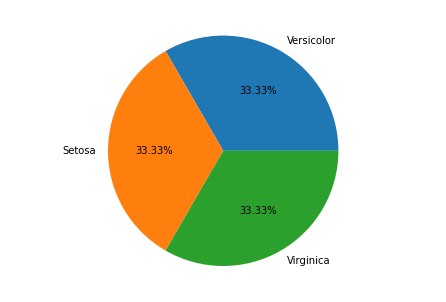

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

Histogram

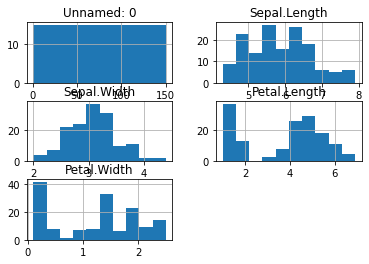

In [26]:
data.hist()
plt.show()

Scatterplot

In [28]:
X = data['Sepal.Length'].values.reshape(-1,1)

Y = data['Sepal.Width'].values.reshape(-1,1)


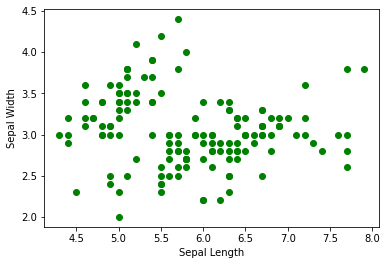

In [29]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='g')
plt.show()

**To conclude,**
**if Logistic Regression is used for iris flower classification then accuracy is 97%,**
**if SVC is used then accuracy is 97%,**
**if KNN is used then accuracy is 97%,**
**if Decision tree is used then accuracy is 94%**
